# Extracción de Características de Imagen con Manos
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [2]:
MNT_DRIVE_DIR = '/content/drive/'
DRIVE_DIR = '/content/drive/MyDrive/'
DATOS_DIR = DRIVE_DIR + 'Datos/'
FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/Fuentes'

from google.colab import drive
drive.mount(MNT_DRIVE_DIR)

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


**Propiedades Geométricas de una Imagen**

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.measure import regionprops, find_contours
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage import io
import pandas as pd
import numpy as np
import glob
import math

arch = DATOS_DIR + '/Fingers/samples/1R.png'
imagen = io.imread(arch)

# # busca umbral global con método estadístico de Otsu
umbral = threshold_otsu(imagen)

# # binariza la imagen
imagen_bn = (imagen > umbral)*1

# # cierra pequeños huecos/cortes que pudiera tener la imagen de la mano
imagen_bn = closing(imagen_bn, square(3))

# # remueve artefactos que pudiera tener la imagen en los bordes
imagen_lista = clear_border(imagen_bn)

# obtiene valores geométricos a partir de las regiones (objetos "aislados") en la imagen
regiones = regionprops(imagen_lista)

# datos de la primera región. Debería ser la única si la mano fue segmentada correctamente
region = regiones[0]

for prop in region:
  if prop not in ['convex_image', 'coords', 'filled_image', 'image']:
    print('%20s:    '% prop, region[prop])

                area:     379
                bbox:     (9, 22, 47, 43)
           bbox_area:     798
            centroid:     (31.350923482849606, 31.522427440633244)
         convex_area:     476
        eccentricity:     0.8995398454257507
 equivalent_diameter:     21.967197988242077
        euler_number:     1
              extent:     0.474937343358396
  feret_diameter_max:     40.85339643163099
         filled_area:     379
      inertia_tensor:     [[27.23102735 25.20971728]
 [25.20971728 71.93753873]]
inertia_tensor_eigvals:     [83.27698084083175, 15.89158523709866]
               label:     1
      local_centroid:     (22.350923482849606, 9.522427440633246)
   major_axis_length:     36.50248886655961
   minor_axis_length:     15.945700479865366
             moments:     [[3.79000000e+02 3.60900000e+03 4.46870000e+04 6.25023000e+05]
 [8.47100000e+03 7.11100000e+04 7.81870000e+05 9.79436800e+06]
 [2.16599000e+05 1.71510000e+06 1.77599480e+07 2.09920974e+08]
 [5.93940500e+06 4.

**Grafica imagen original, imagen binarizada y contorno**

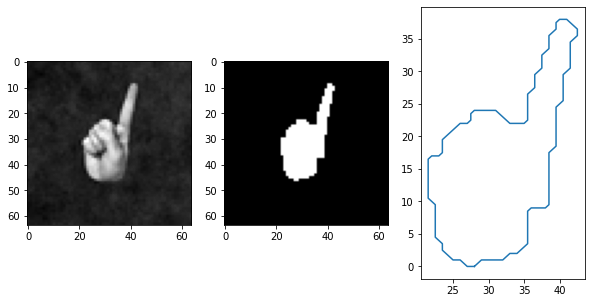

In [4]:
fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(imagen, cmap='gray')
axs[1].imshow(imagen_bn, cmap='gray')

contour = find_contours(imagen_bn, 0.5)[0]
y, x = contour.T

axs[2].plot(x, y.max()-y)
